<a href="https://colab.research.google.com/github/juancaalcaraz/G15PracticaProfesionalizante-II-ISPC/blob/main/ModeloCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

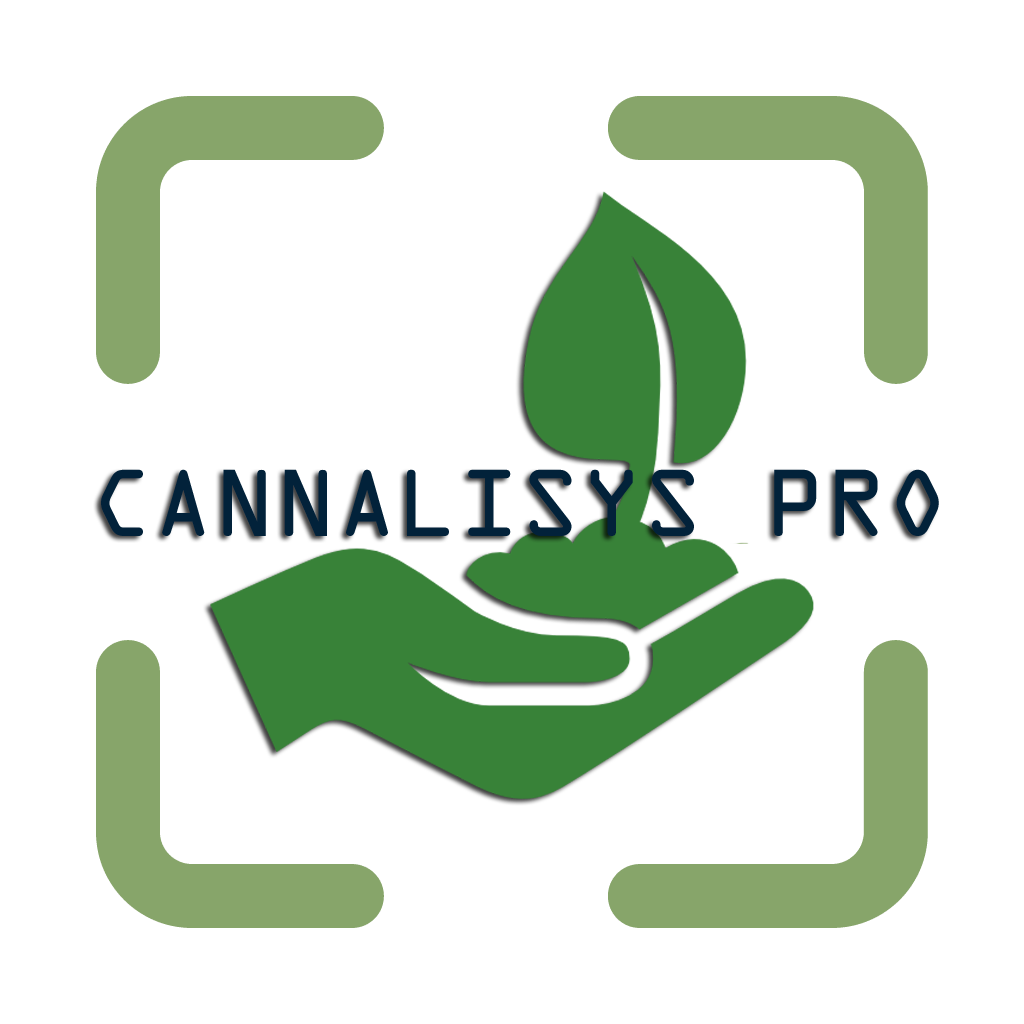

# MODELO CNN Y DETECCIÓN DE BORDES PARA LA CLASIFICACIÓN DE DIFERENTES VARIEDADES DE LA PLANTA DE CANNABIS.

##   Iniciamos está investigación con el objetivo de garantizar que el paciente o el laboratorio que desee realizar aceite o algún derivado de la planta de cannabis con fines medicinales tenga la certeza que la variedad elegida sea la adecuada para su tratamiento. Tratando de evitar que, por algún error, la variedad cosechada sea inadecuada para el tratamiento que se desea realizar.
## Está tarea puede ser muy compleja devido a que las flores que produce la planta de cannabis son muy similares entre sí, lo cual puede llevar a confundir entre sí a las distintas variedades existentes creando la posibilidad de realizar por error un aceite que es para una dolencia distinta a la que se desea tratar.     

### Ilustración de las distintas variedades medicinales de cannabis.


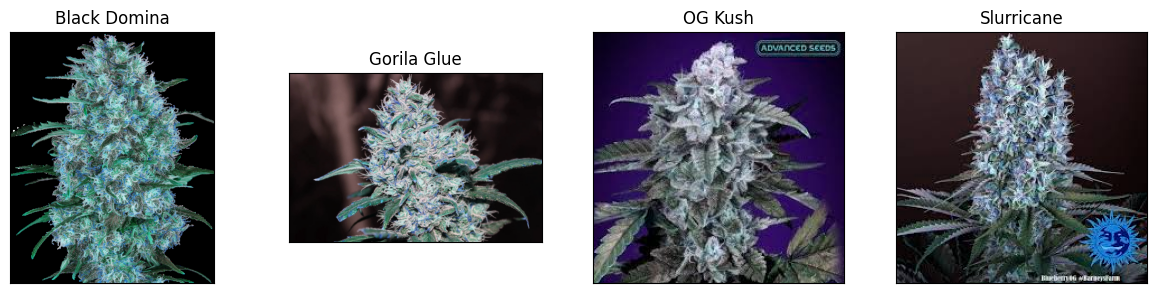

In [ ]:
import matplotlib.pyplot as plt
import cv2
class_names = ['Black Domina', 'Gorila Glue', 'OG Kush', 'Slurricane']
plt.figure(figsize=(15,15))
dir = ['/content/black-domina.png', '/content/gorilla-glue-auto.jpg','/content/Ogkush.jpeg', '/content/Slurricane.jpg']
for i in range(4):
    imagen = cv2.imread(dir[i])
    # Creamos un subplot para cada imagen
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    # Cargamos la imagen.
    plt.imshow(imagen)

    # Cargando la etiqueta de la imagen.
    plt.title(class_names[i], fontsize=12)

# Mostrando el resultado.
plt.show()

## Dado que la forma de las flores es un factor importante abordaremos este problema utilizando detección de bordes en las imágenes para capturar las características de ancho de las hojas así como también el ancho y largo de las flores.

## **Inconvenientes encontrados al realizar está investigación**
1. Al realizar está investigación nos encontramos con que no habia un dataset representativo de las diferentes variedades de cannabis, por lo que tuvimos que crear nuestro propio dataset con imagenes descargadas de internet.
2. El dataset creado con imagenes de internet es de un tamaño puequeño, un total de 1852 imagenes de entrenamiento dividos en 4 diferentes variedades de canabis.
3. Dado que no podemos asegurar con exactitud que las imágenes descargadas pertenecen realmente a la variedad que dicen ser, el dataset puede estar sesgado y ser no representativo.
4. La fuente de datos desde donde se creo el dataset no es confiable al cien por ciento.


## **Criterios de aceptación e implementación del trabajo**
## Dado los inconvenientes nombrados anteriormente consideramos un buen desempeño en nuestra investigación si logramos una precisión mayor a la adivinacion aleatoria de la clase, es decir si $P>0.5$ Sin embargo, el modelo solo será puesto en producción cuando estemos seguros que la fuente de datos sea confiable y el dataset sea representativo y no se encuentre sesgado.   

## **Creando el modelo CNN para la clasificación**

### Actualizamos keras e importamos los paquetes necesarios.  

In [ ]:
!pip install --upgrade keras tensorflow

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

### Definimos el modelo con una matriz de 256, 256, 3 para el tamaño de las imágenes, el mismo posee 4 capas de convolución y una capa de salida con 4 neuronas y activación softmax.

In [ ]:
# Creamos el modelo para el entrenamiento
from keras.layers import LeakyReLU
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)), #Capa de convolucion
    layers.MaxPooling2D((2, 2)),# Capa de pooling
    layers.Conv2D(64, (3, 3), activation='relu'),#Capa de convolucion
    layers.MaxPooling2D((2, 2)),# Capa de pooling
    layers.Conv2D(128, (3, 3), activation='relu'),#Capa de convolucion
    layers.MaxPooling2D((2, 2)),# Capa de pooling
    layers.Conv2D(128, (3, 3), activation='relu'),#Capa de convolucion
    layers.MaxPooling2D((2, 2)),# Capa de pooling
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax') # capa de salida con softmax y salida de 4 neuronas.
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Sumario o resumen del modelo.

In [ ]:
#Modelo antes de entrenar.
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 30, 30, 128)      

### Para crear el dataset con el cúal entrenaremos el modelo, las imágenes fueron guardadas en matrices de numpy para luego cargarlas y ser concatenadas en la variable image_train. Puedes ver como fueron procesadas estas imágenes en el archivo [comprimir_imagenes.py](https://github.com/juancaalcaraz/G15PracticaProfesionalizante-II-ISPC/blob/main/comprimir_imagenes.py).
### **Las variedades elegidas para esta investigación junto con su aplicación medicinal son:**
1. Black domina:  muy adecuada para usos medicinales como pueden ser trastornos de la ansiedad, estrés, pérdida del apetito o tensión muscular.
2. OG Kush:  Los efectos de la OG Kush sugieren que ayuda a controlar la ansiedad, la depresión y el dolor crónico. Otro de los efectos más reportados es el hambre, por lo que la OG Kush también puede ser beneficiosa para la pérdida de apetito y la caquexia asociada al cáncer o al SIDA/VIH.

3. Slurricane: Sus efectos relajantes y calmantes pueden ayudar a aliviar los problemas relacionados con el estado de ánimo y el insomnio, siendo una excelente opción para quienes padecen este tipo de trastornos. También suele utilizarse para tratar enfermedades crónicas, ya que proporciona alivio sin ejercer el tipo de efecto demasiado sedante que provocan otras variedades.
4. Gorila glue: Es utilizada para tratar la ansiedad, el estrés o la depresión.  

In [ ]:
# Cargo las imagenes guardadas en matrices de Numpy.
X_black, X_gorila = np.load('BlackDomina_images.npz'), np.load('GorilaGlue_images.npz')
X_og, X_slur = np.load('OGKush_images.npz'), np.load('Slurricane_images.npz')

In [ ]:
#junto las imagenes para entrenar
image_train = np.concatenate((X_black['imagenes'], X_gorila['imagenes'], X_og['imagenes'], X_slur['imagenes']), axis=0)

### Total de imágenes para el entrenamiento.

In [ ]:
len(image_train)

1852

array([[[166, 148, 215],
        [174, 149, 223],
        [181, 157, 231],
        ...,
        [143, 172, 226],
        [ 51,  80, 114],
        [ 53,  88, 118]],

       [[207, 189, 255],
        [168, 151, 215],
        [210, 193, 255],
        ...,
        [146, 182, 238],
        [ 81, 107, 154],
        [ 44,  80, 108]],

       [[214, 195, 254],
        [159, 142, 207],
        [186, 165, 233],
        ...,
        [152, 184, 249],
        [120, 149, 214],
        [ 66, 103, 128]],

       ...,

       [[112,  98, 152],
        [131, 116, 173],
        [118, 103, 160],
        ...,
        [121, 124, 186],
        [127, 142, 200],
        [ 66, 100, 123]],

       [[138, 125, 178],
        [123, 108, 165],
        [134, 119, 176],
        ...,
        [134, 136, 194],
        [ 93, 105, 159],
        [155, 158, 213]],

       [[125, 111, 166],
        [153, 134, 195],
        [121, 105, 159],
        ...,
        [129, 123, 178],
        [147, 143, 195],
        [134, 135, 191]]], dtype=uint8)
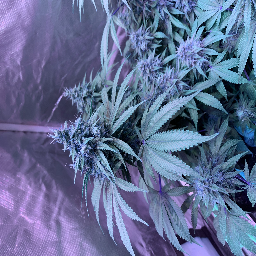

In [ ]:
image_train[2]

## **Operadores Sobel y Canny para la detección de bordes en las imágenes.**
### Tanto el operador sobel como canny devuelven una representación binaria de los bordes de la imágen, donde los pixeles que corresponden a los bordes se representan en blanco(255) y los pixeles donde no existe un borde se lo representa en color negro(0).
## **Procesamiento de las imagenes**
### Para el procesamiento de las imágenes hemos decidido combinar el operador Sobel y el operador Canny. Aplicandolos por separado a cada imágen, para luego unírlos con el método addWeighted de Opencv asignandoles a cada operador un peso medio de 0.5 en la imágen final.   

In [ ]:
import cv2
import numpy as np
def procesamiento_imagenes(imagenes: np.ndarray) -> np.ndarray:
  """

  #################################################################################
  #################################################################################
  ##                                                                             ##
  ## Función para aplicarse a un conjunto de imagenes usando detección de bordes ##
  ## con los métodos Sobel y Canny.                                              ##
  ## La misma modifica al dataset que se le pase por parámetros.                 ##
  ##                                                                             ##
  #################################################################################
  #################################################################################

  Parámetros
  ----------
  imagenes (np.ndarray) : Array de imagenes a procesar

  returns:
  None : La función modifica directamete al Array de imagenes.
  """
  # Detectar bordes con Canny y el operador sobel.
  for i in range(len(imagenes)):

    # Cargamos la imagen para la deteccion de bordes.
    image = imagenes[i]
    image = image.astype(np.uint8)
    # Aplicar el operador Sobel en x y en y
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Calcular la magnitud y la dirección del gradiente
    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    magnitude = np.uint8(magnitude)

    # Aplicar el algoritmo de Canny
    edges = cv2.Canny(image, 100, 200)
    edges = cv2.merge([edges, edges, edges])
    # Sumar las imágenes resultantes de Sobel y Canny
    combined_edges = cv2.addWeighted(magnitude, 0.5, edges, 0.5, 0)
    # La imagen anterior del dataset es reemplazada
    # Por la nueva imagen con bordes detectados.
    imagenes[i] = combined_edges

## Procesamiento de las imágenes en image_train

In [ ]:
procesamiento_imagenes(image_train)

### Mostrando las imágenes finales luego de la fiunción de procesamiento.

array([[[  0,   0,   0],
        [146, 140, 144],
        [ 13,  13,  13],
        ...,
        [ 51,  57,  61],
        [192, 186, 238],
        [  0,   0,   0]],

       [[160, 168, 150],
        [ 12,  22,   5],
        [ 21,  20,  24],
        ...,
        [ 44,  46,  63],
        [206, 202, 142],
        [ 82,  84, 110]],

       [[160, 172, 162],
        [ 56,  64,  54],
        [ 46,  48,  44],
        ...,
        [ 72,  82,  10],
        [ 98,  93,  29],
        [134, 138, 152]],

       ...,

       [[  2,   0,   2],
        [  4,   4,   7],
        [ 24,  25,  25],
        ...,
        [ 76,  32,  46],
        [222, 164, 224],
        [228, 166, 218]],

       [[ 35,  31,  36],
        [ 30,  26,  28],
        [ 35,  35,  36],
        ...,
        [194, 154, 167],
        [ 58,  24,  26],
        [ 88,  36,  63]],

       [[  0,   0,   0],
        [  8,  12,   9],
        [ 45,  45,  49],
        ...,
        [ 58,  27,  36],
        [ 26,  34,  32],
        [  0,   0,   0]]], dtype=uint8)
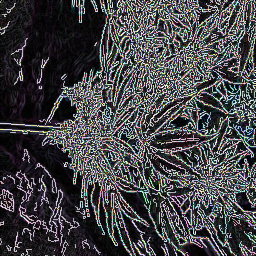

In [ ]:
image_train[2]

array([[[ 0,  0,  0],
        [ 4,  4,  4],
        [ 4,  3,  5],
        ...,
        [ 0,  0,  1],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 4,  4,  4],
        [ 4,  2,  6],
        ...,
        [10,  8, 10],
        [10,  8, 10],
        [10,  8, 10]],

       [[ 0,  1,  1],
        [ 4,  4,  5],
        [ 4,  2,  8],
        ...,
        [ 6,  6,  4],
        [ 6,  6,  4],
        [ 6,  6,  4]],

       ...,

       [[10,  7,  9],
        [34, 37, 33],
        [63, 70, 60],
        ...,
        [29, 30, 30],
        [39, 40, 40],
        [32, 32, 32]],

       [[ 4,  5,  5],
        [46, 52, 45],
        [54, 66, 50],
        ...,
        [ 4,  4,  5],
        [20, 22, 22],
        [25, 26, 26]],

       [[ 0,  0,  0],
        [51, 57, 50],
        [53, 64, 48],
        ...,
        [10, 12, 12],
        [ 4,  5,  5],
        [ 0,  0,  0]]], dtype=uint8)
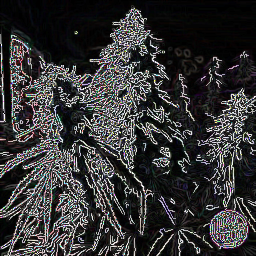

In [ ]:
image_train[4]

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[27, 21, 24],
        [30, 24, 28],
        [22, 18, 20],
        ...,
        [16, 22, 22],
        [16, 24, 24],
        [17, 25, 25]],

       [[10,  5,  8],
        [ 9,  8,  8],
        [10, 14, 12],
        ...,
        [ 4, 10, 10],
        [ 4,  8,  9],
        [ 5,  8,  9]],

       [[ 0,  0,  0],
        [ 2,  1,  2],
        [ 6,  7,  6],
        ...,
        [ 0,  1,  2],
        [ 0,  1,  1],
        [ 0,  0,  0]]], dtype=uint8)
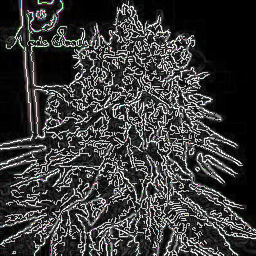

In [ ]:
image_train[1610]

## Uniendo las etiquetas de clase.

In [ ]:
#junto las etiquetas para el entreamiento
etiquetas_train = np.concatenate((X_black['etiquetas'], X_gorila['etiquetas'], X_og['etiquetas'], X_slur['etiquetas']), axis=0)

In [ ]:
etiquetas_train[2]

'Black Domina'

## Utilizamos LabelEncoder para representar las etiquetas de clase en números enteros.

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Utilizamos LabelEncoder para pasar a numeros
# las etiquetas de entrenamiento
encoding = LabelEncoder()

In [ ]:
encoded_etiquetas = encoding.fit_transform(etiquetas_train)

In [ ]:
encoded_etiquetas[4]

0

## Dividimos el dataset para el entrenamiento.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(image_train, encoded_etiquetas, test_size= .1, random_state=42)

## Procedemos a entrenar al modelo de clasificación.

In [ ]:
# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=20, batch_size=64,
          validation_data=(X_validation, y_validation))

Epoch 1/20
27/27 [==============================] - 6s 127ms/step - loss: 48.3410 - accuracy: 0.3307 - val_loss: 1.3012 - val_accuracy: 0.4247
Epoch 2/20
27/27 [==============================] - 3s 114ms/step - loss: 1.2801 - accuracy: 0.4286 - val_loss: 1.2645 - val_accuracy: 0.4409
Epoch 3/20
27/27 [==============================] - 3s 129ms/step - loss: 1.1416 - accuracy: 0.5210 - val_loss: 1.2420 - val_accuracy: 0.4355
Epoch 4/20
27/27 [==============================] - 3s 127ms/step - loss: 0.9363 - accuracy: 0.6261 - val_loss: 1.2476 - val_accuracy: 0.5054
Epoch 5/20
27/27 [==============================] - 3s 118ms/step - loss: 0.7696 - accuracy: 0.6975 - val_loss: 1.1632 - val_accuracy: 0.5430
Epoch 6/20
27/27 [==============================] - 3s 117ms/step - loss: 0.5473 - accuracy: 0.7899 - val_loss: 1.2915 - val_accuracy: 0.5430
Epoch 7/20
27/27 [==============================] - 3s 119ms/step - loss: 0.4528 - accuracy: 0.8343 - val_loss: 1.3930 - val_accuracy: 0.5430
Epoch

## Cargamos las matrices numpy con las imágenes y las etiquetas para la validación del modelo.

In [ ]:
#Etiquetas y imagenes de validacion.
X_tblack, X_tgorila = np.load('TBlackDomina_images.npz'), np.load('TGorilaGlue_images.npz')
X_tog, X_tslur = np.load('TOGKush_images.npz'), np.load('TSlurricane_images.npz')

In [ ]:
etiqueta_test = np.concatenate((X_tblack['etiquetas'], X_tgorila['etiquetas'], X_tog['etiquetas'], X_tslur['etiquetas']), axis=0)
image_test = np.concatenate((X_tblack['imagenes'], X_tgorila['imagenes'], X_tog['imagenes'], X_tslur['imagenes']), axis=0)


### Pasamos las etiquetas de clase a números enteros.

In [ ]:
test_labels = encoding.transform(etiqueta_test)

### Procesamos las imágenes de image_test con la función procesamiento_imagenes tal como lo hicimos con image_train.

In [ ]:
procesamiento_imagenes(image_test)

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  2,   2,   2],
        ...,
        [108,  24,  45],
        [ 98,  10,  32],
        [250, 146, 176]],

       [[  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2],
        ...,
        [ 17,  14,   5],
        [ 58,  25,  32],
        [ 78,  36,  46]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  1,   1,   1],
        ...,
        [  1,   4,   2],
        [  3,   2,   1],
        [  0,   0,   0]]], dtype=uint8)
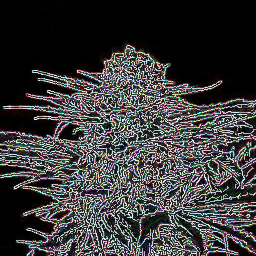

In [ ]:
image_test[2]

### Evaluación del modelo.

In [ ]:
# Evaluación del modelo
test_loss, test_acc = model.evaluate(image_test.astype('float32'), test_labels)

print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 24ms/step - loss: 1.2253 - accuracy: 0.6750
Test accuracy: 0.675000011920929


### Resumen final del modelo.

In [ ]:
#Modelo despues de entrenar.
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 30, 30, 128)      

### Guardamos el modelo en diferentes formatos para realizar pruebas posteriores.  

In [ ]:
#Guardar el modelo en formato keras.
model.save('modelo_relu_entrenado_0675.keras')

In [ ]:
#Guardar el modelo en formato h5.
model.save('modelo_relu_entrenado_0675.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.


In [ ]:
model_json = model.to_json()
with open("model675.json", "w") as json_file:
    json_file.write(model_json)

# Guardar los pesos del modelo
model.save_weights("model675.weights.h5")
print("Modelo guardado correctamente.")

Modelo guardado correctamente.


In [ ]:
import pickle
# Guardar el objeto de codificación por si queremos
# Agregar más neuronas de salida.
with open('encoding.pkl', 'wb') as f:
    pickle.dump(encoding, f)

### Debido a que el modelo pesa cerca de 150MB, disminuimos el peso en MB del modelo para simplificar su implementación. Esto lo hacemos cambiando tipo de datos del modelo de Float32 al tipo de datos Float16, aunque, debemos considerar que este cambio puede afectar la precision del modelo.

In [ ]:
import tensorflow as tf
#Cargamos el modelo previamente entrenado
model = tf.keras.models.load_model('modelo_relu_entrenado_0675.h5')

In [ ]:
# Cuantización a 16 bits
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]  # Cuantización a float16
tflite_model = converter.convert()

# Guarda el modelo cuantizado
with open('model_quantized_16bit.tflite', 'wb') as f:
    f.write(tflite_model)


# **Conclusión Final**
## El operador sobel y el operador canny pueden ser una gran herramienta para abordar el problema de clasificación de diferentes variedades para la creación de aceite de cannabis medicinal.
## Hemos tenido una buena puntuación para los criterios de evalución del proyecto superando la adivinación aleatoria, sin embargo, dado que el dataset no es cien por ciento confiable y existe una alta probabilidad de que se encuentre sesgado. Para llegar a conclusiones más exactas y fructiferes se debería repetir está experimentación cuando se encuentre una fuente de datos confiable y se obtenga un dataset con el menor sesgo posible.
## Gracias a esta investigación tenemos un buen punto de partida para continuar mejorando la calidad de la producción de aceite cannabis en futuras investigaciones referidas a las diferentes variedades que posee esta planta.
    